In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [2]:
A = array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
A

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [3]:
M = mean(A.T, axis = 1)
M

array([1.81, 1.91])

In [4]:
C = A - M
C

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [5]:
V = cov(C.T)
V

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [6]:
values, vectors = eig(V)
print(values)
print('\n')
print(vectors)

[0.0490834  1.28402771]


[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


In [7]:
P = vectors.T.dot(C.T)
P

array([[-0.17511531,  0.14285723,  0.38437499,  0.13041721, -0.20949846,
         0.17528244, -0.3498247 ,  0.04641726,  0.01776463, -0.16267529],
       [-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
        -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056]])

## Inbuilt_PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(2) #2 denotes no. of input features

In [10]:
pca.fit(A) #'A' denotes the input data

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.components_ #components is the features

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

In [14]:
#eigen_values
pca.explained_variance_

array([1.28402771, 0.0490834 ])

In [13]:
#ratio between 2 variables
pca.explained_variance_ratio_

array([0.96318131, 0.03681869])

In [15]:
B = pca.transform(A)
B

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

In [17]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.get_dataset_names()

C:\Users\Vidhubala\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\Vidhubala\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [19]:
ds = sns.load_dataset('iris') 
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
X = ds.loc[:, 'sepal_length' : 'petal_width']
y = ds.loc[:,'species']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [73]:
pca.explained_variance_ratio_.sum()

1.0

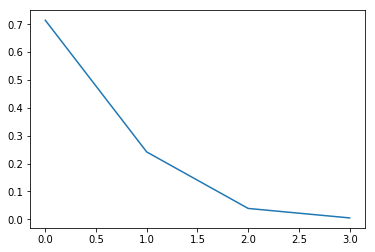

In [74]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [57]:
#PCA with two features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth = 2, random_state = 0 )  
clas.fit(x_train, y_train)  

y_pred = clas.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
print(confusion_matrix(y_test, y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[11  0  0]
 [ 0  4  2]
 [ 0  5  8]]
0.7666666666666667


C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
from sklearn import datasets

In [80]:
ds1 = datasets.load_iris() 
ds2 = pd.DataFrame(ds1.data, columns = ds1.feature_names)
ds2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(ds2), columns = ds2.columns)

In [83]:
#PCA
pca = PCA(n_components = 4)
pca.fit_transform(data_scaled)

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

In [84]:
#loading scores or eigen_vectors
print(pd.DataFrame(pca.components_, columns = data_scaled.columns, index = ['PC-1', 'PC-2', 'PC-3', 'PC-4']))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.521066         -0.269347           0.580413          0.564857
PC-2           0.377418          0.923296           0.024492          0.066942
PC-3          -0.719566          0.244382           0.142126          0.634273
PC-4          -0.261286          0.123510           0.801449         -0.523597


In [89]:
ds1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')